# Deep Learning with Keras

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

from sklearn.datasets import make_blobs

n_samples = 10000

# To generate our fabricated data set, we'll create two blobs of
# randomly distributed data at two corners of the graph...
centers = [(0.9, 0.05), (0.05, 0.94)]
X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=0.4,
                  centers=centers, shuffle=False, random_state=42)

# Then filter out only the values that lie within [0,1]:
features = []
labels = []
for feature, label in zip(X, y):
    if (feature[0] >= 0 and feature[0] <= 1.0 and feature[1] >= 0 and feature[1] <= 1.0):
        features.append(feature)
        labels.append(label)

# And convert the results back into numpy arrays:
X = np.array(features)
y = np.array(labels)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


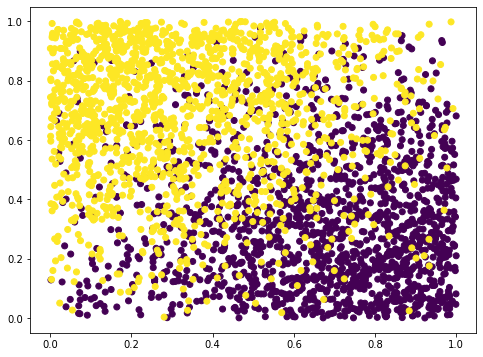

In [2]:
%matplotlib inline
from pylab import *

plt.figure(figsize=(8, 6))
plt.scatter(X[:,0], X[:,1], c=y.astype(np.float))
plt.show()

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

We'll start with just two layers, as this is a pretty simple data set to classify. We already know a simple linear model would do just fine, so there's no need to go "deep" on this really.

In Keras, it's super-simple to set up a neural network of pretty much any topology you want. With just 3 lines of code, we'll set up a neural network with however many input nodes we need (2, in this case, for the X and Y coordinats of each point,) 32 hidden units in the middle, and a final sigmoid activation function above it all to choose one classification or the other. Sigmoid is the activation function of choice for binary classification problems such as this.

In [5]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=X_train.shape[1:]))
model.add(Dense(1, activation='sigmoid'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                96        
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________


The next step is to compile our model, using a given loss function and a given optimizer. For binary classification problems, "binary_crossentropy" is the right choice. There are many optimization functions to choose from, but the Adam optimizer tends to perform well in many cases.

In [7]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Now that we've built and compiled our model, we can train it. With one line of code, we can feed our training features and labels into our model, using a give batch size of how many samples we want to process at once, and how many epochs we want to run the training over.

In [8]:
history = model.fit(X_train, y_train,
                    batch_size=100,
                    epochs=10,
                    verbose=2,
                    validation_data=(X_test, y_test))

Epoch 1/10
25/25 - 1s - loss: 0.6905 - accuracy: 0.5215 - val_loss: 0.6703 - val_accuracy: 0.5475 - 1s/epoch - 52ms/step
Epoch 2/10
25/25 - 0s - loss: 0.6585 - accuracy: 0.7214 - val_loss: 0.6408 - val_accuracy: 0.8180 - 70ms/epoch - 3ms/step
Epoch 3/10
25/25 - 0s - loss: 0.6317 - accuracy: 0.8051 - val_loss: 0.6153 - val_accuracy: 0.8262 - 83ms/epoch - 3ms/step
Epoch 4/10
25/25 - 0s - loss: 0.6092 - accuracy: 0.8133 - val_loss: 0.5936 - val_accuracy: 0.8311 - 75ms/epoch - 3ms/step
Epoch 5/10
25/25 - 0s - loss: 0.5886 - accuracy: 0.8153 - val_loss: 0.5733 - val_accuracy: 0.8377 - 64ms/epoch - 3ms/step
Epoch 6/10
25/25 - 0s - loss: 0.5688 - accuracy: 0.8227 - val_loss: 0.5541 - val_accuracy: 0.8393 - 79ms/epoch - 3ms/step
Epoch 7/10
25/25 - 0s - loss: 0.5498 - accuracy: 0.8252 - val_loss: 0.5342 - val_accuracy: 0.8459 - 63ms/epoch - 3ms/step
Epoch 8/10
25/25 - 0s - loss: 0.5302 - accuracy: 0.8309 - val_loss: 0.5153 - val_accuracy: 0.8508 - 81ms/epoch - 3ms/step
Epoch 9/10
25/25 - 0s - l

Keras prints out the accuracy as it trains the model, but to make sure we're not just overfitting to the training data, we can easily evaulate it against our test data. The evaluate() function does this for us:

In [9]:
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

20/20 [==============================] - 0s 5ms/step - loss: 0.4794 - accuracy: 0.8443
Test loss: 0.47941848635673523
Test accuracy: 0.8442623019218445


Basically the same accuracy we were getting with other machine learning techniques - maybe a little better!

So, that was a little too easy of a problem for a neural network. Let's make things a little more interesting by defining four different categories in our test data set instead of two, all of them overlapping in weird ways:

In [10]:
centers = [(0.9, 0.05), (0.05, 0.94), (0.3, 0.6), (0.8, 0.8)]
X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=0.2,
                  centers=centers, shuffle=False, random_state=42)

# Then filter out only the values that lie within [0,1]:
features = []
labels = []
for feature, label in zip(X, y):
    if (feature[0] >= 0 and feature[0] <= 1.0 and feature[1] >= 0 and feature[1] <= 1.0):
        features.append(feature)
        labels.append(label)

# And convert the results back into numpy arrays:
X = np.array(features)
y = np.array(labels)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


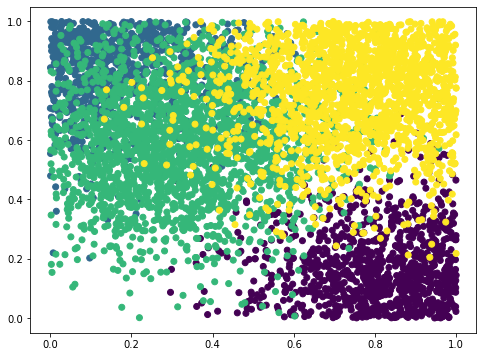

In [11]:
from pylab import *

plt.figure(figsize=(8, 6))
plt.scatter(X[:,0], X[:,1], c=y.astype(np.float))
plt.show()

Since this is no longer a "binary" classification problem (we have more than two categories,) we need to do some extra pre-processing of our data first.

Neurons need to be interpreted as "on" or "off" at the end of the day, so we need to encode our 4 categories in a binary manner. For this, we use "one-hot" encoding, using a binary 0 or 1 in an array to represent a given value.

For example, if we label our four categories as 0, 1, 2, and 3, our fourth category (3) would be encoded as

0 0 0 1

And the second category (1) would be:

0 1 0 0

Keras provides a handy to_categorical functions that does this conversion for us. So, let's use it, and look at one sample label before and after the conversion:

In [12]:
print (y[1])
y = keras.utils.to_categorical(y)
print (y[1])

0
[1. 0. 0. 0.]


Now that our data's in the format it needs to be in, we can split it into train and test sets:

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Now we'll set up our model again. Since we now have 4 categories instead of 2, our final output layer now has 4 units in it. And, instead of a sigmoid activation function, we'll use softmax. Softmax converts each output value into a probability for each classification, from which we can choose the highest one as our prediction.

In [14]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=X_train.shape[1:]))
model.add(Dense(4, activation='softmax'))
          
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 32)                96        
                                                                 
 dense_3 (Dense)             (None, 4)                 132       
                                                                 
Total params: 228
Trainable params: 228
Non-trainable params: 0
_________________________________________________________________


The next step is to compile it. Since this is not a binary classification problem, we'll use "categorical_crossentropy" instead of "binary_crossentropy" as our loss function.

In [15]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [16]:
history = model.fit(X_train, y_train,
                    batch_size=100,
                    epochs=10,
                    verbose=2,
                    validation_data=(X_test, y_test))

Epoch 1/10
49/49 - 1s - loss: 1.3464 - accuracy: 0.4085 - val_loss: 1.2867 - val_accuracy: 0.5693 - 994ms/epoch - 20ms/step
Epoch 2/10
49/49 - 0s - loss: 1.2315 - accuracy: 0.6071 - val_loss: 1.1950 - val_accuracy: 0.6033 - 177ms/epoch - 4ms/step
Epoch 3/10
49/49 - 0s - loss: 1.1413 - accuracy: 0.6453 - val_loss: 1.1063 - val_accuracy: 0.6340 - 184ms/epoch - 4ms/step
Epoch 4/10
49/49 - 0s - loss: 1.0545 - accuracy: 0.6673 - val_loss: 1.0183 - val_accuracy: 0.6672 - 122ms/epoch - 2ms/step
Epoch 5/10
49/49 - 0s - loss: 0.9701 - accuracy: 0.7073 - val_loss: 0.9335 - val_accuracy: 0.6921 - 102ms/epoch - 2ms/step
Epoch 6/10
49/49 - 0s - loss: 0.8912 - accuracy: 0.7198 - val_loss: 0.8547 - val_accuracy: 0.7162 - 105ms/epoch - 2ms/step
Epoch 7/10
49/49 - 0s - loss: 0.8193 - accuracy: 0.7314 - val_loss: 0.7834 - val_accuracy: 0.7270 - 103ms/epoch - 2ms/step
Epoch 8/10
49/49 - 0s - loss: 0.7564 - accuracy: 0.7424 - val_loss: 0.7234 - val_accuracy: 0.7444 - 98ms/epoch - 2ms/step
Epoch 9/10
49/49

In [17]:
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

38/38 [==============================] - 0s 2ms/step - loss: 0.6279 - accuracy: 0.8033
Test loss: 0.6278765201568604
Test accuracy: 0.80331951379776


Not bad for such a messy data set! It would probaby benefit from more training epochs, too.

Let's see if we can improve our results by adding another layer of neurons, making this truly a "deep learning" example. All we're changing here is adding an extra layer of 16 units in between our first layer of 32 and our final layer of 4. The idea is to learn higher-level patterns in the data with that extra layer.

It's a fairly common pattern to halve the number of units with each subsequent layer, so that's why I chose 16.

Let's run it and see if it does better.

In [18]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=X_train.shape[1:]))
model.add(Dense(16, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
          
print(model.summary())

history = model.fit(X_train, y_train,
                    batch_size=100,
                    epochs=10,
                    verbose=2,
                    validation_data=(X_test, y_test))

scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                96        
                                                                 
 dense_5 (Dense)             (None, 16)                528       
                                                                 
 dense_6 (Dense)             (None, 4)                 68        
                                                                 
Total params: 692
Trainable params: 692
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
49/49 - 1s - loss: 1.3011 - accuracy: 0.4512 - val_loss: 1.2465 - val_accuracy: 0.4398 - 1s/epoch - 29ms/step
Epoch 2/10
49/49 - 0s - loss: 1.1669 - accuracy: 0.5477 - val_loss: 1.0926 - val_accuracy: 0.6224 - 254ms/epoch - 5ms/step
Epoch 3/10
49/49 - 0s - loss: 0.9986 - accuracy: 0.6768 - val_loss: 0.9

It did! That extra layer did some good.

What if we take it even further, and add yet another layer? We'll sandwich an 8-unit hidden layer in between the 16-unit one and our final output of 4:

In [19]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=X_train.shape[1:]))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
          
print(model.summary())

history = model.fit(X_train, y_train,
                    batch_size=100,
                    epochs=10,
                    verbose=2,
                    validation_data=(X_test, y_test))

scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 32)                96        
                                                                 
 dense_8 (Dense)             (None, 16)                528       
                                                                 
 dense_9 (Dense)             (None, 8)                 136       
                                                                 
 dense_10 (Dense)            (None, 4)                 36        
                                                                 
Total params: 796
Trainable params: 796
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
49/49 - 1s - loss: 1.3147 - accuracy: 0.4130 - val_loss: 1.2488 - val_accuracy: 0.4938 - 1s/epoch - 26ms/step
Epoch 2/10
49/49 - 0s - loss: 1.1620 - accuracy: 0.5809 - val_

Well, that actually did more harm than good. That usually means we're starting to overfit the data; this network is probably more complex than it needs to be at this point.

What if instead of going deep, we go wide? We can try going back to 2 layers, but just adding more neurons to that single hidden layer. Let's try doubling it from 32 to 64:

In [20]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=X_train.shape[1:]))
model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
          
print(model.summary())

history = model.fit(X_train, y_train,
                    batch_size=100,
                    epochs=10,
                    verbose=2,
                    validation_data=(X_test, y_test))

scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 64)                192       
                                                                 
 dense_12 (Dense)            (None, 4)                 260       
                                                                 
Total params: 452
Trainable params: 452
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
49/49 - 1s - loss: 1.2873 - accuracy: 0.5116 - val_loss: 1.2230 - val_accuracy: 0.5361 - 1s/epoch - 22ms/step
Epoch 2/10
49/49 - 0s - loss: 1.1627 - accuracy: 0.6324 - val_loss: 1.1179 - val_accuracy: 0.6357 - 176ms/epoch - 4ms/step
Epoch 3/10
49/49 - 0s - loss: 1.0622 - accuracy: 0.6775 - val_loss: 1.0177 - val_accuracy: 0.6672 - 160ms/epoch - 3ms/step
Epoch 4/10
49/49 - 0s - loss: 0.9661 - accuracy: 0.6968 - val_loss: 0.9207 - val

Well that's interesting - not as good as our network with 2 hidden layers, but better than the one with 3. Often, you can get the same accuracy with a wide network as you do with a deep network, but the deeper networks tend to converge more quickly. Had we allowed this "wide" network to run over more epochs, it would likely match the deep one. Try it and see!